In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('C:/Users/0004IW744/Desktop/Python/Assignments/18.Forecasting/CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [5]:
data['quarter'] = 'nan'
data['year'] = 'nan'

In [6]:
data.head()

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,nan,nan
1,Q2_86,2244.960999,nan,nan
2,Q3_86,2533.804993,nan,nan
3,Q4_86,2154.962997,nan,nan
4,Q1_87,1547.818996,nan,nan


In [7]:
for i in range(len(data)):
    data['quarter'][i] = data.Quarter[i][0:2]
    data['year'][i] = data.Quarter[i][3:5]

In [8]:
data

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [9]:
data1 = data.copy()

In [10]:
data1 = data1.drop('Quarter', axis = 1)

In [11]:
data1.columns

Index(['Sales', 'quarter', 'year'], dtype='object')

In [12]:
data1 = pd.get_dummies(data1, columns = ['quarter'])
data1.head()

,Sales,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4
0,1734.827000,86,1,0,0,0
1,2244.960999,86,0,1,0,0
2,2533.804993,86,0,0,1,0
3,2154.962997,86,0,0,0,1
4,1547.818996,87,1,0,0,0


In [13]:
data1 = data1[['year', 'quarter_Q1', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4', 'Sales']]
data1.head()

,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,Sales
0,86,1,0,0,0,1734.827000
1,86,0,1,0,0,2244.960999
2,86,0,0,1,0,2533.804993
3,86,0,0,0,1,2154.962997
4,87,1,0,0,0,1547.818996


<AxesSubplot:>

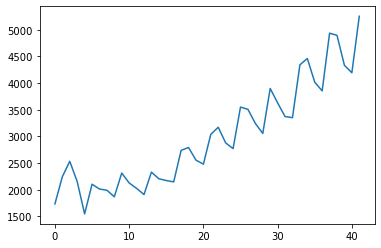

In [14]:
data1.Sales.plot()

<AxesSubplot:xlabel='year', ylabel='Sales'>

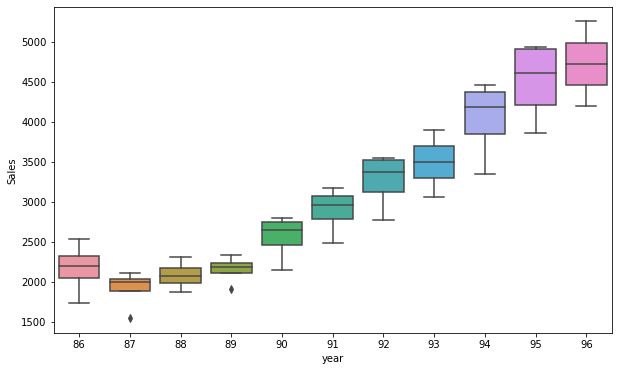

In [15]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "year", y = "Sales", data = data1)

<AxesSubplot:xlabel='year', ylabel='Sales'>

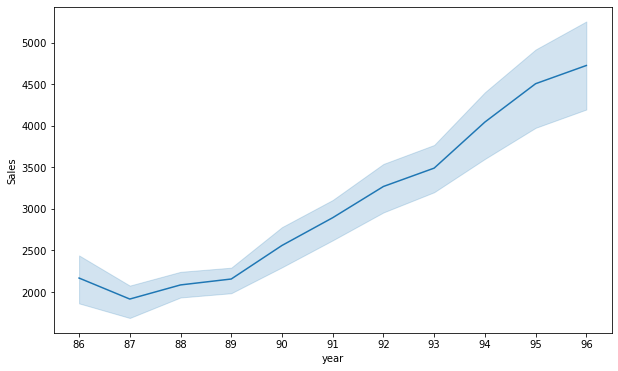

In [16]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = "year", y = "Sales", data = data1)

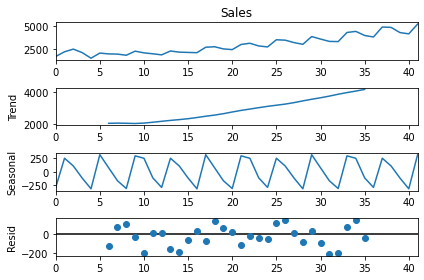

<Figure size 720x432 with 0 Axes>

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data1.Sales, period = 12)
decompose_ts_add.plot()
plt.figure(figsize = (10, 6))

plt.show()

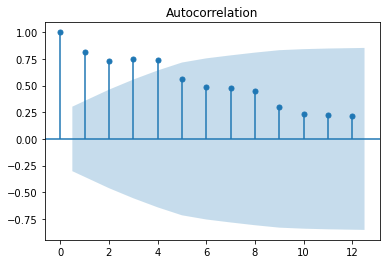

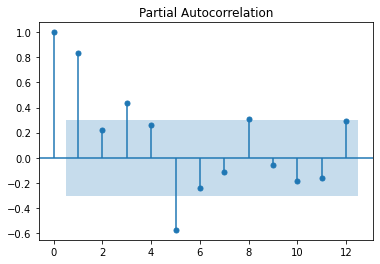

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1.Sales, lags = 12)
tsa_plots.plot_pacf(data1.Sales, lags = 12)
plt.show()

In [19]:
data1.shape

(42, 6)

In [20]:
data2 = data1.copy()

In [21]:
data2["t"] = np.arange(1,43)
data2["t_square"] = data2["t"]*data2["t"]
data2.tail()

,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,Sales,t,t_square
37,95,0,1,0,0,4936.0,38,1444
38,95,0,0,1,0,4895.0,39,1521
39,95,0,0,0,1,4333.0,40,1600
40,96,1,0,0,0,4194.0,41,1681
41,96,0,1,0,0,5253.0,42,1764


In [22]:
data2["log_sales"] = np.log(data2["Sales"])
data2.head()

,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,Sales,t,t_square,log_sales
0,86,1,0,0,0,1734.827000,1,1,7.458663
1,86,0,1,0,0,2244.960999,2,4,7.716443
2,86,0,0,1,0,2533.804993,3,9,7.837477
3,86,0,0,0,1,2154.962997,4,16,7.675529
4,87,1,0,0,0,1547.818996,5,25,7.344602


In [23]:
train = data2.head(32)
test = data2.tail(10)

In [24]:
train

,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,Sales,t,t_square,log_sales
0,86,1,0,0,0,1734.827000,1,1,7.458663
1,86,0,1,0,0,2244.960999,2,4,7.716443
2,86,0,0,1,0,2533.804993,3,9,7.837477
3,86,0,0,0,1,2154.962997,4,16,7.675529
4,87,1,0,0,0,1547.818996,5,25,7.344602
5,87,0,1,0,0,2104.411995,6,36,7.651791
6,87,0,0,1,0,2014.362999,7,49,7.608058
7,87,0,0,0,1,1991.746998,8,64,7.596767
8,88,1,0,0,0,1869.049999,9,81,7.533186
9,88,0,1,0,0,2313.631996,10,100,7.746574


In [25]:
test

,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,Sales,t,t_square,log_sales
32,94,1,0,0,0,3352.0,33,1089,8.117312
33,94,0,1,0,0,4342.0,34,1156,8.376090
34,94,0,0,1,0,4461.0,35,1225,8.403128
35,94,0,0,0,1,4017.0,36,1296,8.298291
36,95,1,0,0,0,3854.0,37,1369,8.256867
37,95,0,1,0,0,4936.0,38,1444,8.504311
38,95,0,0,1,0,4895.0,39,1521,8.495970
39,95,0,0,0,1,4333.0,40,1600,8.374015
40,96,1,0,0,0,4194.0,41,1681,8.341410
41,96,0,1,0,0,5253.0,42,1764,8.566555


## Model Building for Model Based Forcasting Methods

### Linear

In [26]:
import statsmodels.formula.api as smf 
model_linear = smf.ols('Sales~t', data = train).fit()
preds_linear = pd.Series(model_linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(preds_linear))**2))
rmse_linear

752.9233932767115

### Exponential

In [27]:
model_exp = smf.ols('log_sales~t',data = train).fit()
preds_exp = pd.Series(model_exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(preds_exp)))**2))
rmse_exp

590.3316432076576

### Quadratic

In [28]:
model_quad = smf.ols('Sales~t+t_square',data = train).fit()
preds_quad = pd.Series(model_quad.predict(test[["t","t_square"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(preds_quad))**2))
rmse_quad

457.73573554072897

### Additive seasonality 

In [29]:
model_as = smf.ols('Sales~quarter_Q1+quarter_Q2+quarter_Q3', data = train).fit()
preds_as = pd.Series(model_as.predict(test[['quarter_Q1', 'quarter_Q2', 'quarter_Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(preds_as))**2))
rmse_add_sea

1850.4665461858353

### Additive Seasonality Quadratic

In [30]:
model_asq = smf.ols('Sales~quarter_Q1+quarter_Q2+quarter_Q3+t+t_square', data = train).fit()
preds_asq = pd.Series(model_asq.predict(test[['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(preds_asq))**2))
rmse_add_sea_quad

277.35107711284843

### Multiplicative Seasonality

In [31]:
model_ms = smf.ols('log_sales~quarter_Q1+quarter_Q2+quarter_Q3', data = train).fit()
preds_ms = pd.Series(model_ms.predict(test[['quarter_Q1', 'quarter_Q2', 'quarter_Q3']]))
rmse_multi_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(preds_ms)))**2))
rmse_multi_sea

1908.250394836116

### Multiplicative Additive Seasonality

In [32]:
model_mas = smf.ols('log_sales~t+quarter_Q1+quarter_Q2+quarter_Q3', data = train).fit()
preds_mas = pd.Series(model_mas.predict(test[['t', 'quarter_Q1', 'quarter_Q2', 'quarter_Q3']]))
rmse_multi_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(preds_mas)))**2))
rmse_multi_add_sea

448.867818269187

In [33]:
train1 = data1.head(32)
test1 = data1.tail(10)

In [34]:
train1.head()

,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,Sales
0,86,1,0,0,0,1734.827000
1,86,0,1,0,0,2244.960999
2,86,0,0,1,0,2533.804993
3,86,0,0,0,1,2154.962997
4,87,1,0,0,0,1547.818996


In [35]:
test1.head()

,year,quarter_Q1,quarter_Q2,quarter_Q3,quarter_Q4,Sales
32,94,1,0,0,0,3352.0
33,94,0,1,0,0,4342.0
34,94,0,0,1,0,4461.0
35,94,0,0,0,1,4017.0
36,95,1,0,0,0,3854.0


## Model Building for Data Driven Forecasting Methods

In [36]:
def RMSE(org, preds):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(preds))**2))
    return rmse

### Simple Exponential Method

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_se = SimpleExpSmoothing(train1["Sales"]).fit()
preds_se = model_se.predict(start = test1.index[0],end = test1.index[-1])
rmse_sim_exp = RMSE(test1.Sales, preds_se)
rmse_sim_exp

1034.935926527898

### Holt method

In [38]:
from statsmodels.tsa.holtwinters import Holt
model_h = Holt(train1["Sales"]).fit()
preds_h = model_h.predict(start = test1.index[0],end = test1.index[-1])
rmse_holt = RMSE(test1.Sales, preds_h)
rmse_holt

786.7664832816314

### Holts winter exponential smoothing with additive seasonality and additive trend

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_hwe_as_at = ExponentialSmoothing(train1["Sales"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
preds_hwe_as_at = model_hwe_as_at.predict(start = test1.index[0],end = test1.index[-1])
rmse_hwe_add_sea_add_trend = RMSE(test1.Sales, preds_hwe_as_at)
rmse_hwe_add_sea_add_trend

478.1154043906915

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [40]:
model_hwe_ms_at = ExponentialSmoothing(train1["Sales"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit()
preds_hwe_ms_at = model_hwe_ms_at.predict(start = test1.index[0],end = test1.index[-1])
rmse_hwe_multi_sea_add_trend = RMSE(test1.Sales, preds_hwe_ms_at)
rmse_hwe_multi_sea_add_trend

630.5343070137576

In [41]:
list = [['Linear', rmse_linear], ['Exponential', rmse_exp], ['Quadratic', rmse_quad], ['Additive Seasonality', rmse_add_sea], 
        ['Additive Seasonality Quadratic', rmse_add_sea_quad], ['Multiplicative Seasonality', rmse_multi_sea], 
        ['Multiplicative Additive Seasonality', rmse_multi_add_sea], ['Simple Exponential', rmse_sim_exp], ['Holt', rmse_holt],
        ['Holt Exp Additive Seasonality and Trend', rmse_hwe_add_sea_add_trend], 
        ['Holt Exp Multi Seasonality and Additive Trend', rmse_hwe_multi_sea_add_trend]]

In [42]:
dataset = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
dataset

,Model,RMSE_Value
0,Linear,752.923393
1,Exponential,590.331643
2,Quadratic,457.735736
3,Additive Seasonality,1850.466546
4,Additive Seasonality Quadratic,277.351077
5,Multiplicative Seasonality,1908.250395
6,Multiplicative Additive Seasonality,448.867818
7,Simple Exponential,1034.935927
8,Holt,786.766483
9,Holt Exp Additive Seasonality and Trend,478.115404


### Building Final Model

In [43]:
model_final = smf.ols('Sales~quarter_Q1+quarter_Q2+quarter_Q3+t+t_square', data = data2).fit()
preds_final = pd.Series(model_final.predict(data2[['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 't', 't_square']]))
rmse_final = np.sqrt(np.mean((np.array(data2['Sales'])-np.array(preds_final))**2))
rmse_final

159.05522576522475

In [44]:
pred_data = pd.DataFrame({'Actual' : data2.Sales, 'Predicted' : preds_final})
pred_data

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


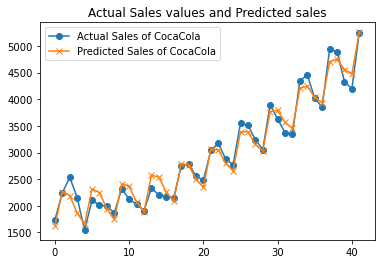

<Figure size 720x432 with 0 Axes>

In [45]:
plt.plot(data2.Sales, marker = 'o', label = 'Actual Sales of CocaCola')
plt.plot(preds_final, marker = 'x', label = 'Predicted Sales of CocaCola')
plt.title('Actual Sales values and Predicted sales')
plt.legend()
plt.figure(figsize = (10, 6)) 

plt.show()

# We have got the rmse as 159.05 and plotted actual and predicte values.